# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from IPython.display import JSON

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

#set up lists to hold repsonse info
weather_info=[]

#counters
record = 1
set = 1

#create loop to generate list of cities
for city in cities:
    try:
        response= requests.get(query_url + city).json()
        city_name = response['name']
        lat =response['coord']['lat']
        lng = response['coord']['lon']
        tempmax = response['main']['temp_max']
        hum= response['main']['humidity']
        cloud =response['clouds']['all']
        wind=response['wind']['speed']
        country=response['sys']['country']
        date = response['dt']    
        
        weather_info.append({"City": city_name, 
                   "Lat": lat, 
                   "Lng": lng, 
                   "Max Temp": tempmax, 
                   "Humidity": hum, 
                   "Cloudiness": cloud, 
                   "Wind Speed": wind, 
                   "Country": country, 
                   "Date": date})
                
        #print record number with city
        print(f"Processing Record {record} of Set {set} | {city}")
        record= record + 1
    #exception to so code doesn't break    
    except (KeyError, IndexError):
        print("City not found. Skipping")   
    #group together in sets of 50
    if record == 51:
        record= 1
        set = set + 1

Processing Record 1 of Set 1 | wadena
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | necochea
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | lagoa
Processing Record 8 of Set 1 | gushikawa
Processing Record 9 of Set 1 | keokuk
Processing Record 10 of Set 1 | bonthe
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | nabire
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | alofi
Processing Record 18 of Set 1 | tasiilaq
City not found. Skipping
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | batagay-alyta
Processing Record 21 of Set 1 | garissa
Processing Record 22 of Set 1 | klaksvik
Processing Record 23 of Set 1 | havre-saint-pierre
Processing Record 24 of Set 1 

Processing Record 43 of Set 4 | peniche
Processing Record 44 of Set 4 | sheksna
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | puerto leguizamo
Processing Record 47 of Set 4 | boke
Processing Record 48 of Set 4 | port blair
Processing Record 49 of Set 4 | eyl
Processing Record 50 of Set 4 | virginia beach
Processing Record 1 of Set 5 | yerofey pavlovich
Processing Record 2 of Set 5 | upernavik
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | darhan
Processing Record 5 of Set 5 | dubuque
Processing Record 6 of Set 5 | whyalla
Processing Record 7 of Set 5 | rocha
Processing Record 8 of Set 5 | kavieng
Processing Record 9 of Set 5 | aykhal
Processing Record 10 of Set 5 | ilulissat
Processing Record 11 of Set 5 | paracuru
City not found. Skipping
Processing Record 12 of Set 5 | kloulklubed
Processing Record 13 of Set 5 | harnosand
Processing Record 14 of Set 5 | kerema
Processing Record 15 of Set 5 | baneh
Processing Record 16 of Set 5 | nhulunbu

Processing Record 35 of Set 8 | palmer
Processing Record 36 of Set 8 | ugoofaaru
Processing Record 37 of Set 8 | barela
Processing Record 38 of Set 8 | konstantinovka
Processing Record 39 of Set 8 | lazaro cardenas
Processing Record 40 of Set 8 | isabela
Processing Record 41 of Set 8 | baltasi
Processing Record 42 of Set 8 | morant bay
Processing Record 43 of Set 8 | motema
Processing Record 44 of Set 8 | reftinskiy
Processing Record 45 of Set 8 | tual
Processing Record 46 of Set 8 | taltal
Processing Record 47 of Set 8 | terre haute
Processing Record 48 of Set 8 | koson
Processing Record 49 of Set 8 | donskoye
Processing Record 50 of Set 8 | havelock
Processing Record 1 of Set 9 | ternate
Processing Record 2 of Set 9 | coahuayana
Processing Record 3 of Set 9 | vestmannaeyjar
Processing Record 4 of Set 9 | morehead
Processing Record 5 of Set 9 | innisfail
Processing Record 6 of Set 9 | pemangkat
Processing Record 7 of Set 9 | rondonopolis
Processing Record 8 of Set 9 | oktyabrskiy
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#create dataframe pulled from API call
weatherinfo_df= pd.DataFrame(weather_info)
weatherinfo_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wadena,46.44,-95.14,75.20,50,1,4.47,US,1595285337
1,Mataura,-46.19,168.86,39.00,83,76,3.00,NZ,1595284757
2,Tuktoyaktuk,69.45,-133.04,42.80,81,90,9.17,CA,1595285319
3,Necochea,-38.55,-58.74,52.00,94,100,15.99,AR,1595285338
4,Bluff,-46.60,168.33,39.00,83,93,3.00,NZ,1595285338
...,...,...,...,...,...,...,...,...,...
550,Mildura,-34.20,142.15,39.20,100,94,5.82,AU,1595285416
551,Petropavlovsk-Kamchatskiy,53.05,158.65,57.20,87,75,4.47,RU,1595285417
552,Port Hardy,50.70,-127.42,62.60,88,40,10.29,CA,1595285123
553,Shwebo,22.57,95.70,78.08,86,100,8.97,MM,1595285417


In [8]:
#count results
weatherinfo_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#display statistics table
weatherinfo_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.840523,15.891946,69.573171,70.953153,51.405405,7.604144,1.595285e+09
std,32.891098,88.314559,13.604968,19.946444,38.751448,5.110122,1.078493e+02
min,-54.800000,-179.170000,28.400000,7.000000,0.000000,0.040000,1.595285e+09
25%,-6.255000,-61.145000,59.000000,61.000000,8.500000,3.880000,1.595285e+09
50%,22.290000,20.920000,71.600000,75.000000,54.000000,6.780000,1.595285e+09
75%,46.555000,89.630000,80.010000,85.000000,90.000000,10.290000,1.595285e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,29.120000,1.595285e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
hum_hundred = weatherinfo_df.loc[weatherinfo_df["Humidity"] > 100]
hum_hundred

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
#skipped this step because there were no cities with humidity over 100%
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data= 

In [12]:
# Export the City_Data into a csv
weatherinfo_df.to_csv("../output_data/cities.csv")
weatherinfo_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wadena,46.44,-95.14,75.2,50,1,4.47,US,1595285337
1,Mataura,-46.19,168.86,39.0,83,76,3.00,NZ,1595284757
2,Tuktoyaktuk,69.45,-133.04,42.8,81,90,9.17,CA,1595285319
3,Necochea,-38.55,-58.74,52.0,94,100,15.99,AR,1595285338
4,Bluff,-46.60,168.33,39.0,83,93,3.00,NZ,1595285338


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

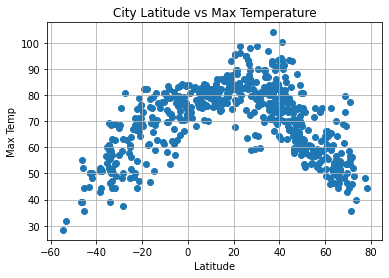

In [13]:
#scatter plot for lat vs temp
plt.scatter(weatherinfo_df["Lat"], weatherinfo_df["Max Temp"])
#make it pretty
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temperature")
plt.grid(True)
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

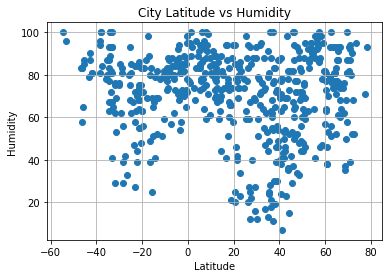

In [14]:
#scatter plot for lat vs humidity
plt.scatter(weatherinfo_df["Lat"], weatherinfo_df["Humidity"])
#make it pretty
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity")
plt.grid(True)
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

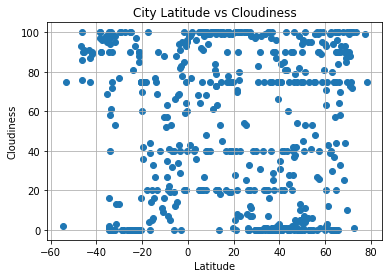

In [15]:
#scatter plot lat vs cloudiness
plt.scatter(weatherinfo_df["Lat"], weatherinfo_df["Cloudiness"])
#make it pretty
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

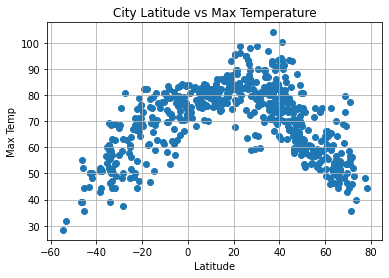

In [16]:
#scatter plot for lat vs wind
plt.scatter(weatherinfo_df["Lat"], weatherinfo_df["Max Temp"])
#make it pretty
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temperature")
plt.grid(True)
plt.show

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_df= weatherinfo_df.loc[weatherinfo_df["Lat"] > 0, :]
southern_df= weatherinfo_df.loc[weatherinfo_df["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6960412985512567


<function matplotlib.pyplot.show(*args, **kw)>

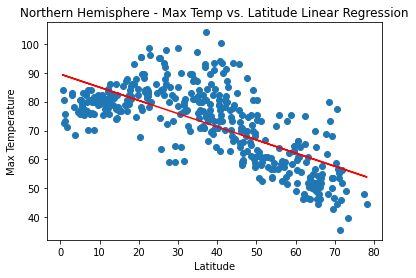

In [19]:
#regression for north temp vs lat
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5, 30), fontsize=12, color= "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")

plt.show


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.750416424836275


<function matplotlib.pyplot.show(*args, **kw)>

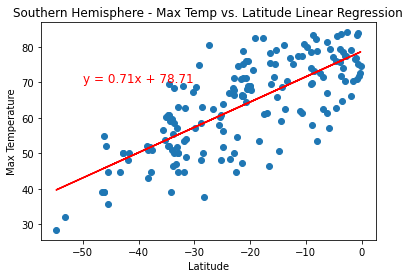

In [20]:
#regression south temp vs lat
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 70), fontsize=12, color= "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")

plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.041519238214837696


<function matplotlib.pyplot.show(*args, **kw)>

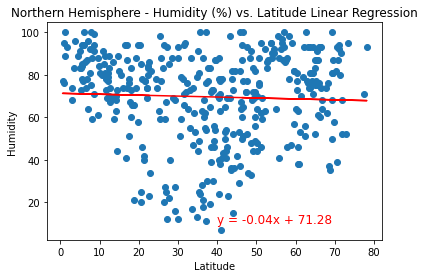

In [21]:
#regression for north humitidy vs lat
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40, 10), fontsize=12, color= "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")

plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.06589328687114625


<function matplotlib.pyplot.show(*args, **kw)>

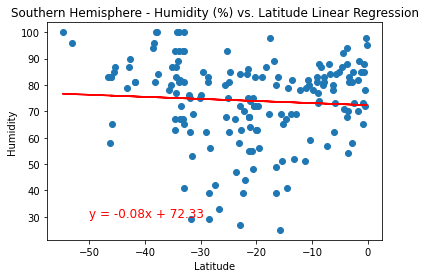

In [26]:
#south regression for humitidity vs lat
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 30), fontsize=12, color= "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")

plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.05385405491865227


<function matplotlib.pyplot.show(*args, **kw)>

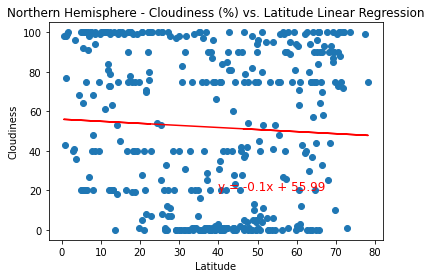

In [27]:
#north cloudiness vs lat
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40, 20), fontsize=12, color= "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")

plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.14931038141194336


<function matplotlib.pyplot.show(*args, **kw)>

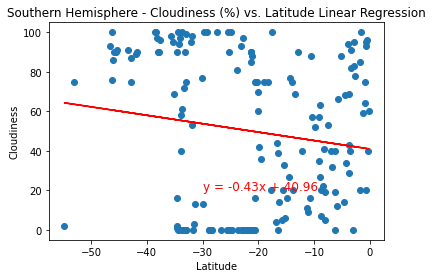

In [28]:
#south cloudiness vs lat
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30, 20), fontsize=12, color= "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")

plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.09305384354451716


<function matplotlib.pyplot.show(*args, **kw)>

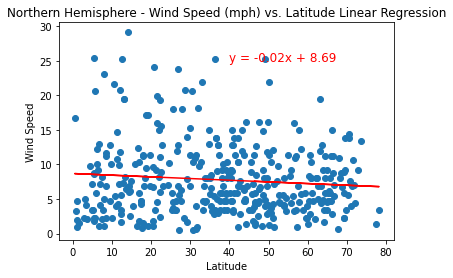

In [29]:
#north wind vs lat regression
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40, 25), fontsize=12, color= "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")

plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0251395005890864


<function matplotlib.pyplot.show(*args, **kw)>

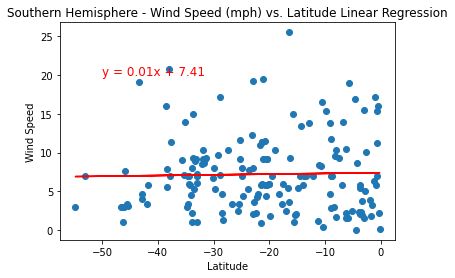

In [30]:
#south wind vs lat regression
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize=12, color= "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")

plt.show